In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
import Scan
import pickle
soc = TopSoc()

In [2]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
def setAndRead(fTone, average=False, verbose=False, outsel="product", setDds=True):
    scan.setTones(np.array([fTone]), np.array([0.9]), np.array([0.0]))
    scan.prepRead(decimation=2, outsel=outsel, setDds=setDds)
    xs = scan.readAndUnpack(nt=1, nsamp=10000, iBegin=1000, average=average)
    if verbose:
        f = scan.toneFreqs[0]
        outCh = scan.outChs[0]
        outDds = scan.outDds[0]
        inCh = scan.inChs[0]
        inOffset = scan.inOffsets[0]
        ntran = scan.ntranByTone[0]
        stream = scan.streamByTone[0]
        print(" f=%8.3f  outCh=%3d  outDds=%+6.3f  inCh=%4d   inOffset=%+6.3f   ntran=%4d   stream=%1d"%(fTone, outCh, outDds, inCh, inOffset, ntran, stream))
    return xs


In [5]:
fMixer = 614
soc.set_mixer(fMixer)
freqs = np.linspace(300,1000,250)

amps = np.zeros(len(freqs))
for i,freq in enumerate(freqs):
    print(i, end=" ")
    x = setAndRead(freq, verbose=True)
    amp = np.abs(x[0][0].mean())
    amps[i] = amp

0  f= 300.000  outCh=381  outDds=+0.400  inCh= 762   inOffset=+0.000   ntran=  95   stream=2
1  f= 302.811  outCh=382  outDds=+0.811  inCh= 764   inOffset=+0.411   ntran=  95   stream=4
2  f= 305.622  outCh=384  outDds=-1.178  inCh= 767   inOffset=-0.377   ntran=  95   stream=7
3  f= 308.434  outCh=385  outDds=-0.766  inCh= 769   inOffset=+0.034   ntran=  96   stream=1
4  f= 311.245  outCh=386  outDds=-0.355  inCh= 771   inOffset=+0.445   ntran=  96   stream=3
5  f= 314.056  outCh=387  outDds=+0.056  inCh= 774   inOffset=-0.344   ntran=  96   stream=6
6  f= 316.867  outCh=388  outDds=+0.467  inCh= 776   inOffset=+0.067   ntran=  97   stream=0
7  f= 319.679  outCh=389  outDds=+0.879  inCh= 778   inOffset=+0.479   ntran=  97   stream=2
8  f= 322.490  outCh=391  outDds=-1.110  inCh= 781   inOffset=-0.310   ntran=  97   stream=5
9  f= 325.301  outCh=392  outDds=-0.699  inCh= 783   inOffset=+0.101   ntran=  97   stream=7
10  f= 328.112  outCh=393  outDds=-0.288  inCh= 785   inOffset=+0.512 

88  f= 547.390  outCh=484  outDds=+0.590  inCh= 968   inOffset=+0.190   ntran= 121   stream=0
89  f= 550.201  outCh=485  outDds=+1.001  inCh= 971   inOffset=-0.599   ntran= 121   stream=3
90  f= 553.012  outCh=487  outDds=-0.988  inCh= 973   inOffset=-0.188   ntran= 121   stream=5
91  f= 555.823  outCh=488  outDds=-0.577  inCh= 975   inOffset=+0.223   ntran= 121   stream=7
92  f= 558.635  outCh=489  outDds=-0.165  inCh= 978   inOffset=-0.565   ntran= 122   stream=2
93  f= 561.446  outCh=490  outDds=+0.246  inCh= 980   inOffset=-0.154   ntran= 122   stream=4
94  f= 564.257  outCh=491  outDds=+0.657  inCh= 982   inOffset=+0.257   ntran= 122   stream=6
95  f= 567.068  outCh=492  outDds=+1.068  inCh= 985   inOffset=-0.532   ntran= 123   stream=1
96  f= 569.880  outCh=494  outDds=-0.921  inCh= 987   inOffset=-0.120   ntran= 123   stream=3
97  f= 572.691  outCh=495  outDds=-0.509  inCh= 989   inOffset=+0.291   ntran= 123   stream=5
98  f= 575.502  outCh=496  outDds=-0.098  inCh= 992   inOffs

177  f= 797.590  outCh= 76  outDds=+1.190  inCh= 153   inOffset=-0.410   ntran=  19   stream=1
178  f= 800.402  outCh= 78  outDds=-0.798  inCh= 155   inOffset=+0.002   ntran=  19   stream=3
179  f= 803.213  outCh= 79  outDds=-0.387  inCh= 157   inOffset=+0.413   ntran=  19   stream=5
180  f= 806.024  outCh= 80  outDds=+0.024  inCh= 160   inOffset=-0.376   ntran=  20   stream=0
181  f= 808.835  outCh= 81  outDds=+0.435  inCh= 162   inOffset=+0.035   ntran=  20   stream=2
182  f= 811.647  outCh= 82  outDds=+0.847  inCh= 164   inOffset=+0.447   ntran=  20   stream=4
183  f= 814.458  outCh= 84  outDds=-1.142  inCh= 167   inOffset=-0.342   ntran=  20   stream=7
184  f= 817.269  outCh= 85  outDds=-0.731  inCh= 169   inOffset=+0.069   ntran=  21   stream=1
185  f= 820.080  outCh= 86  outDds=-0.320  inCh= 171   inOffset=+0.480   ntran=  21   stream=3
186  f= 822.892  outCh= 87  outDds=+0.092  inCh= 174   inOffset=-0.308   ntran=  21   stream=6
187  f= 825.703  outCh= 88  outDds=+0.503  inCh= 1

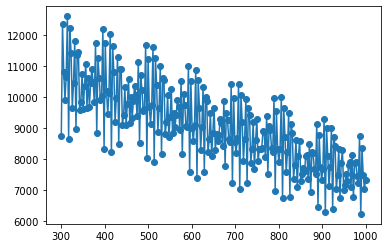

In [6]:
plt.plot(freqs,amps, '-o')
#plt.xlim((997, 998))

In [5]:
inds = amps < 1000
print("bad freqs ",freqs[inds])

bad freqs  [846.34538153 851.12449799]


In [6]:
raise Exception()

Exception: 

In [41]:
freq = 446.34538153
x = setAndRead(freq, verbose=True, average=False)
amp = np.abs(x[0][0].mean())
print("amp =",amp)
      

 f= 446.345  outCh=442  outDds=+0.345  inCh= 884   inOffset=-0.055   ntran= 110   stream=4
amp = 8624.662158890822


In [42]:
for inCh in range(soc.nInCh):
    fdds = .1
    soc.ddscic.set_ddsfreq(ch_id=inCh, f=fdds)
    if inCh == 193:
        print( "inCh, fdds", inCh, fdds)

inCh, fdds 193 0.1


In [43]:
x2 = setAndRead(freq, verbose=True, average=False, outsel="dds", setDds=False)

 f= 446.345  outCh=442  outDds=+0.345  inCh= 884   inOffset=-0.055   ntran= 110   stream=4


In [44]:
from numpy.fft import fft, fftshift
from scipy.signal import welch
xc = np.array(x2[0][0])
xc.shape
fs = soc.pfb_in.get_fb()/soc.ddscic.get_decimate()
F, Y = fftshift(welch(xc,
                          fs,
                          return_onesided=False,
                          detrend=False,
                          nperseg=512), axes=1)


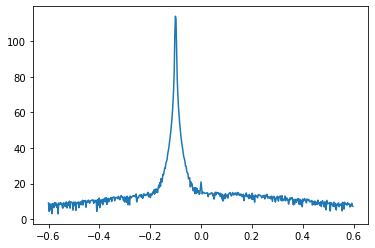

In [45]:
plt.plot((F),10*np.log10(Y))


(2000, 2100)

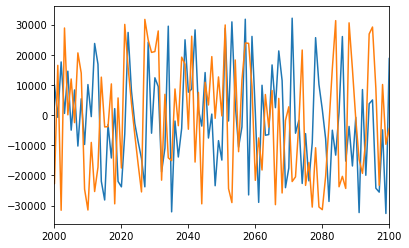

In [36]:
plt.plot(np.real(xc))
plt.plot(np.imag(xc))
plt.xlim((2000,2100))

In [ ]:
importlib.reload(Scan)
scan = Scan.Scan(soc)
fMixer = 614
freq = 1000.06
inCh,inOff = soc.inFreq2chOffset(freq)
print(inCh, inOff)
inFCenter = soc.inCh2FreqCenter(inCh)
print(inFCenter)
soc.set_mixer(fMixer)
x = setAndRead(freq, verbose=True, average=False, outsel="product")

In [ ]:
xc = np.array(x[0][0])
xc.shape
fs = soc.pfb_in.get_fb()/soc.ddscic.get_decimate()
F, Y = fftshift(welch(xc,
                          fs,
                          return_onesided=False,
                          detrend=False,
                          nperseg=512), axes=1)


In [ ]:
plt.plot((F)/1000,10*np.log10(Y))

In [7]:
from numpy.fft import fft, fftshift

Iteration K = 255
Iteration K = 256
Iteration K = 257
Iteration K = 258
Iteration K = 259


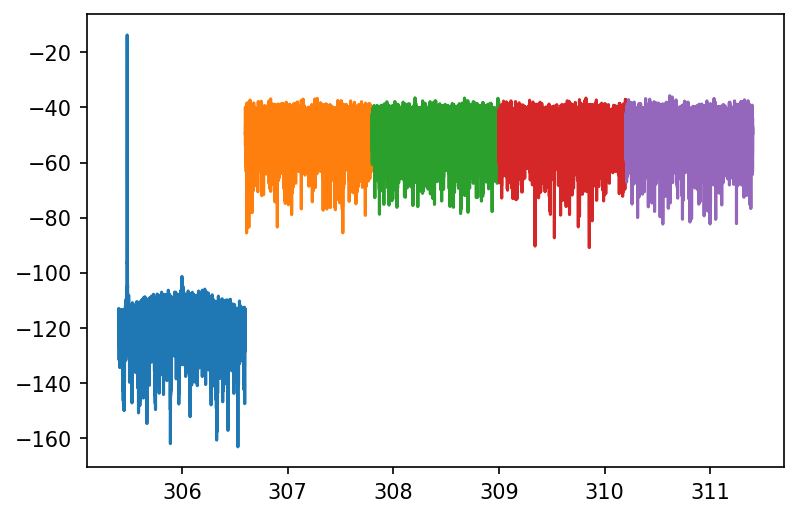

In [14]:
#############################
### Channels Side-by-Side ###
#############################
# Quantization.
soc.pfb_in.qout(0)

# Set Decimation value.
soc.ddscic.decimation(value=2)

# Overwrite qsel.
qsel = soc.ddscic.qdata_qsel_reg
#soc.ddscic.qsel(20)

# By-pass DDS product.
soc.ddscic.dds_outsel(outsel="dds")

# Channel's sampling frequency.
fs = soc.pfb_in.get_fb()/soc.ddscic.get_decimate()

# Channels to plot.
#K = np.arange(soc.pfb_in.N)
#K = np.arange(250)
#K = [403,404,405,406]
K = np.arange(255,260)

plt.figure(dpi=150)

# Frequency and amplitude vectors.
FF = []
AA = []
for KK in K:
    print("Iteration K = %d" %KK)
    fck = KK*soc.pfb_in.get_fc()
    
    # Un-mask channel.
    soc.chsel.set_single(KK)
    
    # Transfer data.
    [xi,xq] = soc.stream.get_data(nt=1,idx=soc.chsel.ch2idx_orig(KK),debug=False)
    x = xi + 1j*xq
    
    # Frequency vector.
    F = (np.arange(len(x))/len(x)-0.5)*fs
    
    # Normalization factor.
    NF = (2**15)*len(F)

    w = np.hanning(len(x))
    xw = x*w
    YY = fftshift(fft(xw))
    YYlog = 20*np.log10(abs(YY)/NF)
    AA = np.concatenate((AA,YYlog))
    
    Fk = F+fck
    FF = np.concatenate((FF,Fk))
    plt.plot(Fk,YYlog)

In [13]:
soc.ddscic.dds_stop()

In [11]:
soc.ddscic.dds_start()

In [15]:
np.arange(200,220)

array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219])

In [15]:
soc.ddscic.qdata_qsel_reg

19